In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [89]:
train = pd.read_csv('titanic_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [32]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
sns.set_style('darkgrid')

<AxesSubplot:>

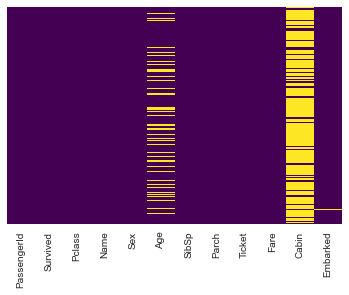

In [91]:
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
#Almost 20% Age Data is missing
(891-714)/891

0.19865319865319866

In [93]:
#Almost 77% Cabin data is missing
(891-204)/891


0.7710437710437711

Only 20 % of Age data is missing so we can replace it in next steps. However most of the cabin data is missing so we will essentially drop it later

**Let's visualize how many people survived**

<AxesSubplot:xlabel='Survived', ylabel='count'>

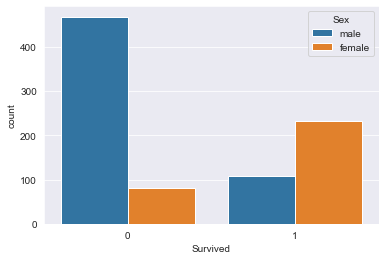

In [94]:
sns.countplot(x='Survived', data=train, hue='Sex')

Looks like most of the people who survived were females.

**Let's visualize class data**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

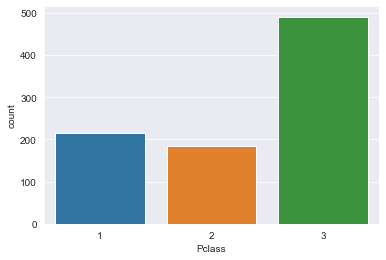

In [95]:
sns.countplot(x='Pclass', data=train)

**Let's see how many people from different passenger classes survived**

<AxesSubplot:xlabel='Survived', ylabel='count'>

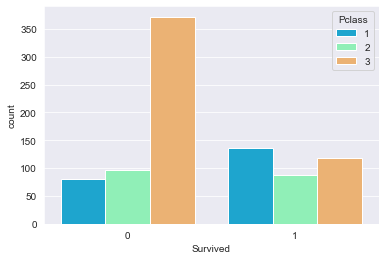

In [96]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

From the data we can see most of people who didn't survive were from the cheapest class, Pclass=3.

**Visualizing Age data** 

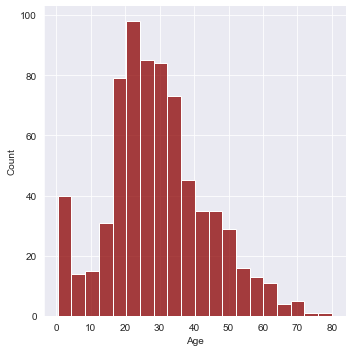

In [97]:
sns.displot(train['Age'].dropna(),color='darkred',bins=20)

Most of the people were aged between 20-40 years.

sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

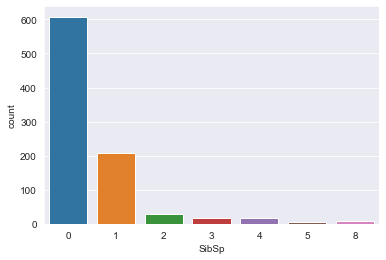

In [98]:
sns.countplot(x='SibSp',data=train,)

In [99]:
600/891

0.6734006734006734

68% people were single or didn't have any siblings on board

<AxesSubplot:>

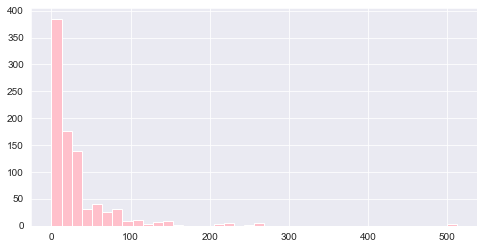

In [100]:
train['Fare'].hist(color='pink',bins=40,figsize=(8,4))

## Data Cleaning

We want to fill in missing age data instead of just dropping the missing age data rows.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

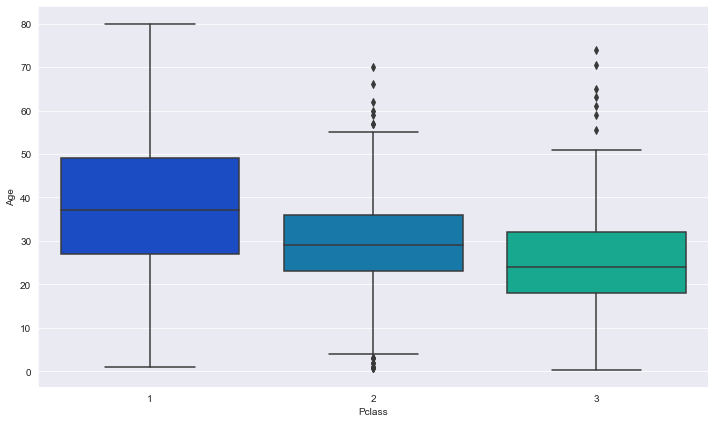

In [101]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

**Calculating mean age by Passenger class**

In [102]:
train.groupby(['Pclass'])['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [103]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [104]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [105]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now we need handle missing values in 'Cabin' and 'Embarked' Column

Since more than 75% data is missing in Cabin column, we will drop it.


In [106]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [107]:
train.drop('Cabin', axis=1, inplace= True)

In [108]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


We will drop any remaining null values.

In [109]:
train.dropna(inplace=True)

In [110]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Features 

In [111]:
sex = pd.get_dummies(train['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [112]:
##Removing multicollinearity

In [113]:
sex.drop('female', axis=1, inplace=True)

In [114]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [115]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [116]:
pClass = pd.get_dummies(train['Pclass'], drop_first=True)
pClass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [117]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [118]:
#Dropping irrelevant columns for now

train.drop(['Sex','Embarked','Name','Ticket','Pclass','PassengerId'],axis=1,inplace=True)

In [119]:
train.head(2)

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833


In [120]:
#Concatenating new columns

train = pd.concat([train,sex,embarked,pClass],axis=1)
train.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0


In [123]:
df = train.copy()
df['Age normalized'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())    
df['Fare normalized'] = (df['Fare'] - df['Fare'].min()) / (df['Fare'].max() - df['Fare'].min())

df.head(2)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Age normalized,Fare normalized
0,0,22.0,1,0,7.2500,1,0,1,0,1,0.271174,0.014151
1,1,38.0,1,0,71.2833,0,0,0,0,0,0.472229,0.139136


In [124]:
df.drop(columns=['Age','Fare'], axis=1, inplace= True)

In [125]:
df.head(2)

,Survived,SibSp,Parch,male,Q,S,2,3,Age normalized,Fare normalized
0,0,1,0,1,0,1,0,1,0.271174,0.014151
1,1,1,0,0,0,0,0,0,0.472229,0.139136



# Building a Logistic Regression model


In [126]:
from sklearn.model_selection import train_test_split

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.3, 
                                                    random_state=101)

## Training and Predicting

In [128]:
from sklearn.linear_model import LogisticRegression

In [144]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Harshit Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [146]:
predictions = logmodel.predict(X_test)
predictions

C:\Users\Harshit Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

## Evaluation

In [147]:
from sklearn.metrics import classification_report

In [148]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.82       267



## Preparing Test data

In [202]:
Y=pd.read_csv('titanic_test.csv')

Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [203]:
Y.groupby(['Pclass'])['Age'].mean()

Pclass
1    40.918367
2    28.777500
3    24.027945
Name: Age, dtype: float64

In [204]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [205]:
Y['Age'] = Y[['Age','Pclass']].apply(impute_age,axis=1)


In [206]:
Y.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [207]:
Y.Fare.mean()

35.6271884892086

In [210]:
Y.Fare.fillna(36, inplace=True)

In [211]:
Y.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [212]:
Y.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)


In [213]:
Y.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S


In [214]:
embarked = pd.get_dummies(Y['Embarked'],drop_first=True)
embarked.head()

,Q,S
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [215]:
pClass = pd.get_dummies(Y['Pclass'], drop_first=True)
pClass.head()

,2,3
0,0,1
1,0,1
2,1,0
3,0,1
4,0,1


In [216]:
sex = pd.get_dummies(Y['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,1
3,1
4,0


In [217]:
Y.drop(['Sex','Pclass','Embarked'], axis=1, inplace=True)

In [218]:

Y = pd.concat([Y,sex,embarked,pClass],axis=1)

Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    int64  
 2   Parch   418 non-null    int64  
 3   Fare    418 non-null    float64
 4   male    418 non-null    uint8  
 5   Q       418 non-null    uint8  
 6   S       418 non-null    uint8  
 7   2       418 non-null    uint8  
 8   3       418 non-null    uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [219]:

Y.head(2)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,34.5,0,0,7.8292,1,1,0,0,1
1,47.0,1,0,7.0000,0,0,1,0,1


In [220]:
df_Y = Y.copy()
df_Y['Age normalized'] = (Y['Age'] - Y['Age'].min()) / (Y['Age'].max() - Y['Age'].min())    
df_Y['Fare normalized'] = (Y['Fare'] - Y['Fare'].min()) / (Y['Fare'].max() - Y['Fare'].min())

df_Y.head(2)

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Age normalized,Fare normalized
0,34.5,0,0,7.8292,1,1,0,0,1,0.452723,0.015282
1,47.0,1,0,7.0000,0,0,1,0,1,0.617566,0.013663


In [221]:
df_Y.drop(['Fare','Age'], inplace= True, axis=1)
df_Y.head(2)

,SibSp,Parch,male,Q,S,2,3,Age normalized,Fare normalized
0,0,0,1,1,0,0,1,0.452723,0.015282
1,1,0,0,0,1,0,1,0.617566,0.013663


In [222]:
df_Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SibSp            418 non-null    int64  
 1   Parch            418 non-null    int64  
 2   male             418 non-null    uint8  
 3   Q                418 non-null    uint8  
 4   S                418 non-null    uint8  
 5   2                418 non-null    uint8  
 6   3                418 non-null    uint8  
 7   Age normalized   418 non-null    float64
 8   Fare normalized  418 non-null    float64
dtypes: float64(2), int64(2), uint8(5)
memory usage: 15.2 KB


In [223]:
y_pred=logmodel.predict(df_Y)

C:\Users\Harshit Srivastava\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [224]:
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [226]:
submission = pd.DataFrame({
        
        "Survived": y_pred
    })

In [227]:
submission.to_csv('submission-1')